In [1]:
#import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
housing = pd.read_csv('California_Housing_Prices.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_8144\530249887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr())


<Axes: >

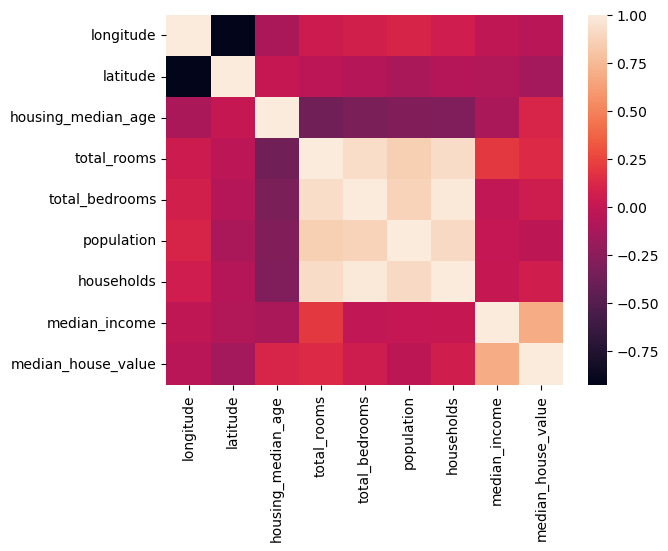

In [5]:
sns.heatmap(housing.corr())

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4773,-118.34,34.03,48,1426,331.0,784,356,1.6581,<1H OCEAN,118800
1552,-121.97,37.79,17,5688,824.0,2111,773,6.6131,<1H OCEAN,312500
5501,-118.43,33.99,35,2243,495.0,1135,465,4.3281,<1H OCEAN,324000
4128,-118.20,34.14,51,1941,378.0,1012,371,3.9375,<1H OCEAN,217000
12871,-121.36,38.69,13,6850,1400.0,4251,1421,3.6989,INLAND,93300


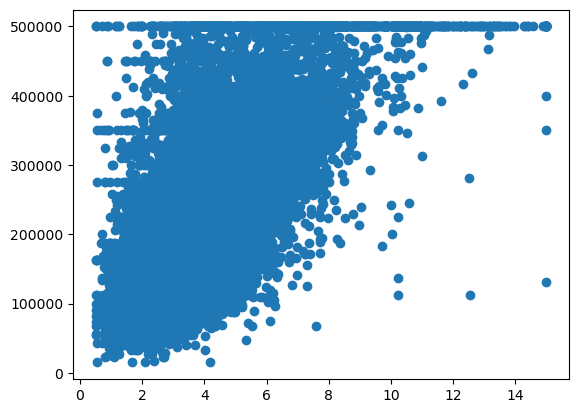

In [8]:
plt.scatter(housing['median_income'], housing['median_house_value'])

In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

# Handling Missing Data

In [10]:
#get size of array
housing.shape

#calculate % of missing data
housing['total_bedrooms'].isnull().sum()/housing.shape[0]*100

1.002906976744186

In [10]:
## 1. Identify columns which has missing data as separate data frame
missing_data = housing.loc[:,housing.isnull().any()]

## 2. Use KNNImputer to add missing data 

#initialise KNNImputer with 3 neighbours 
imputer = KNNImputer(n_neighbors=3)

#apply imputation to return nd array
transformed_data_array = imputer.fit_transform(missing_data)

## 3. convert imputer output array back to dataframe 
transformed_data = pd.DataFrame(transformed_data_array, columns = missing_data.columns)
transformed_data.isnull().sum()

## 4. overlay new columns without missing data on original data
for column in missing_data.columns:
    housing[column] = transformed_data.replace(housing[column], housing[column])
    
housing.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Text(0.5, 1.0, 'Income versus House Value')

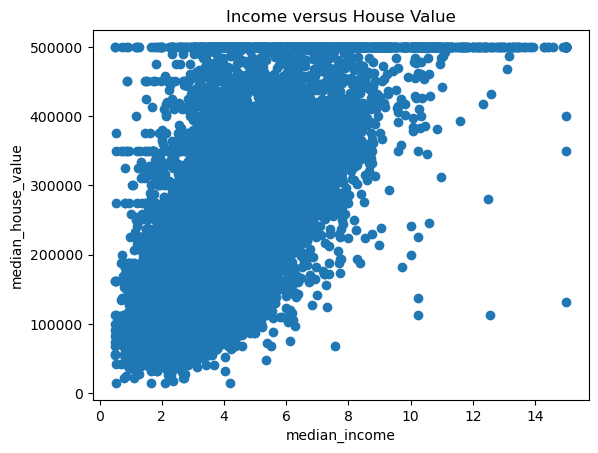

In [11]:
plt.scatter(housing['median_income'], housing['median_house_value'])
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Income versus House Value')

(array([   9.,    7.,   20.,   91.,  317.,  433.,  550.,  464.,  614.,
         739.,  666.,  579.,  701.,  594.,  583.,  788.,  652.,  781.,
         828.,  673.,  652.,  698.,  518.,  402.,  502.,  587.,  502.,
         456.,  399.,  353.,  354.,  376.,  345.,  274.,  235.,  185.,
         179.,  188.,  200.,  218.,  212.,  242.,  167.,  144.,  124.,
         108.,  103.,  106.,   80.,   93.,   71.,   74.,   69.,   92.,
          56.,   42.,   46.,   41.,   33., 1025.]),
 array([ 14999.        ,  23082.36666667,  31165.73333333,  39249.1       ,
         47332.46666667,  55415.83333333,  63499.2       ,  71582.56666667,
         79665.93333333,  87749.3       ,  95832.66666667, 103916.03333333,
        111999.4       , 120082.76666667, 128166.13333333, 136249.5       ,
        144332.86666667, 152416.23333333, 160499.6       , 168582.96666667,
        176666.33333333, 184749.7       , 192833.06666667, 200916.43333333,
        208999.8       , 217083.16666667, 225166.53333333, 233249.

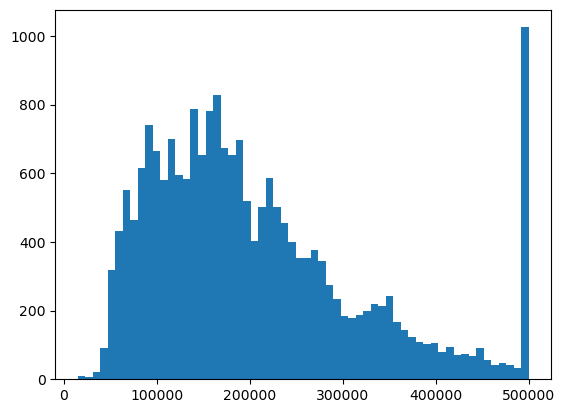

In [12]:
plt.hist(housing['median_house_value'], bins=60)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

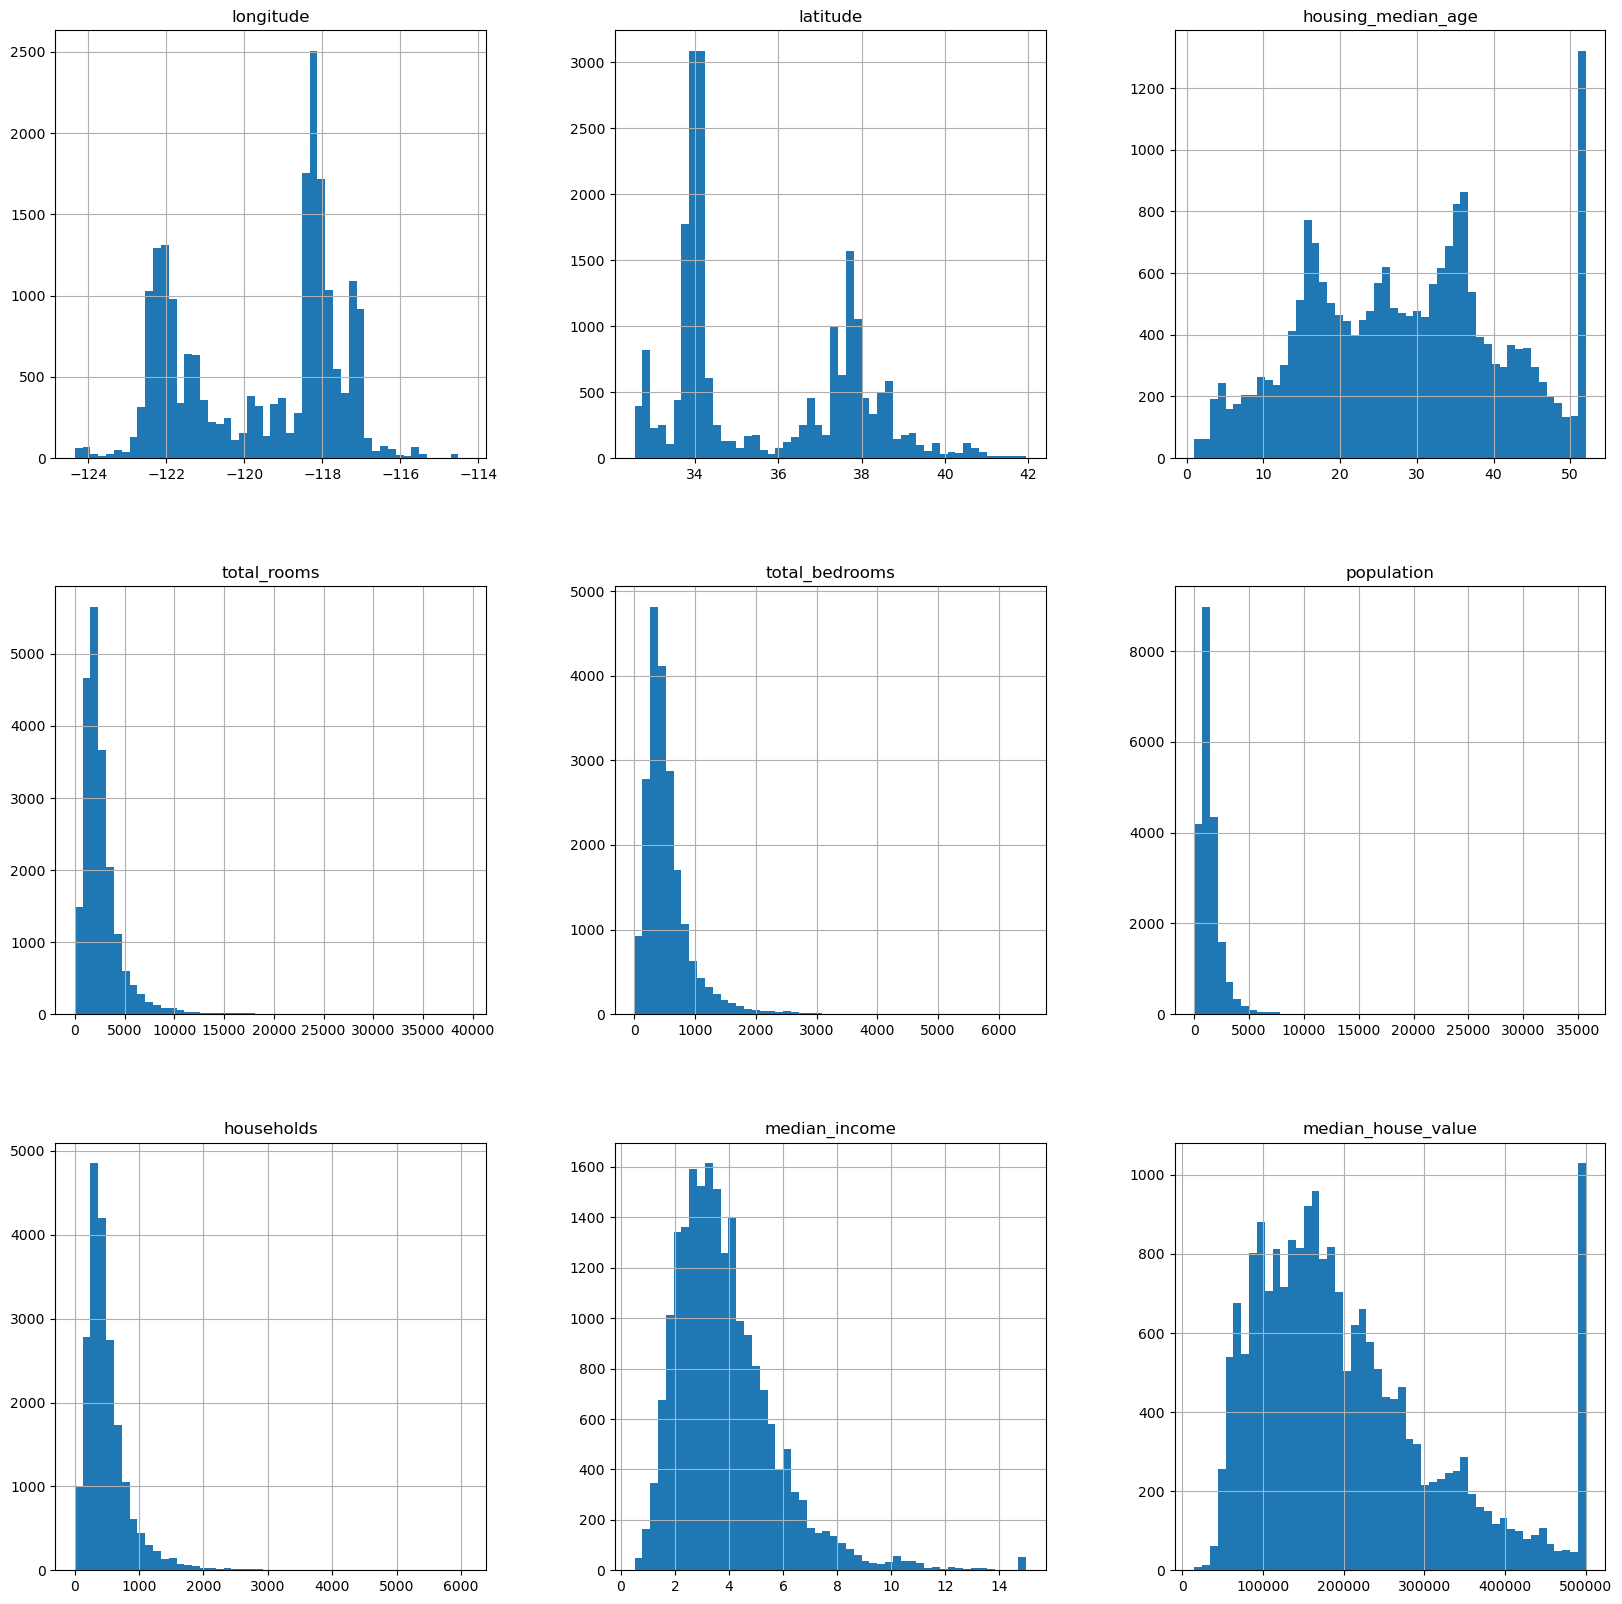

In [13]:
housing.hist(bins=50, figsize=(20,20))

In [14]:
#feature engineering, add some features 

housing['bedroom_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['population_per_household'] = housing['population']/housing['households']
housing['coordinates'] = housing['longitude']/housing['latitude']
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'bedroom_per_room',
       'rooms_per_household', 'population_per_household', 'coordinates'],
      dtype='object')

In [15]:
#remove total_rooms, total_bedrooms, population, households, lat and long

housing = housing.drop('total_rooms', axis=1)
housing = housing.drop('total_bedrooms', axis=1)
housing = housing.drop('population', axis=1)
housing = housing.drop('households', axis=1)
housing = housing.drop('latitude', axis=1)
housing = housing.drop('longitude', axis=1)

housing

,housing_median_age,median_income,ocean_proximity,median_house_value,bedroom_per_room,rooms_per_household,population_per_household,coordinates
0,41,8.3252,NEAR BAY,452600,0.146591,6.984127,2.555556,-3.226769
1,21,8.3014,NEAR BAY,358500,0.155797,6.238137,2.109842,-3.228209
2,52,7.2574,NEAR BAY,352100,0.129516,8.288136,2.802260,-3.229590
3,52,5.6431,NEAR BAY,341300,0.184458,5.817352,2.547945,-3.229855
4,52,3.8462,NEAR BAY,342200,0.172096,6.281853,2.181467,-3.229855
...,...,...,...,...,...,...,...,...
20635,25,1.5603,INLAND,78100,0.224625,5.045455,2.560606,-3.067123
20636,18,2.5568,INLAND,77100,0.215208,6.114035,3.122807,-3.069385
20637,17,1.7000,INLAND,92300,0.215173,5.205543,2.325635,-3.074309
20638,18,1.8672,INLAND,84700,0.219892,5.329513,2.123209,-3.076845


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_per_room'}>,
        <Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'population_per_household'}>],
       [<Axes: title={'center': 'coordinates'}>, <Axes: >, <Axes: >]],
      dtype=object)

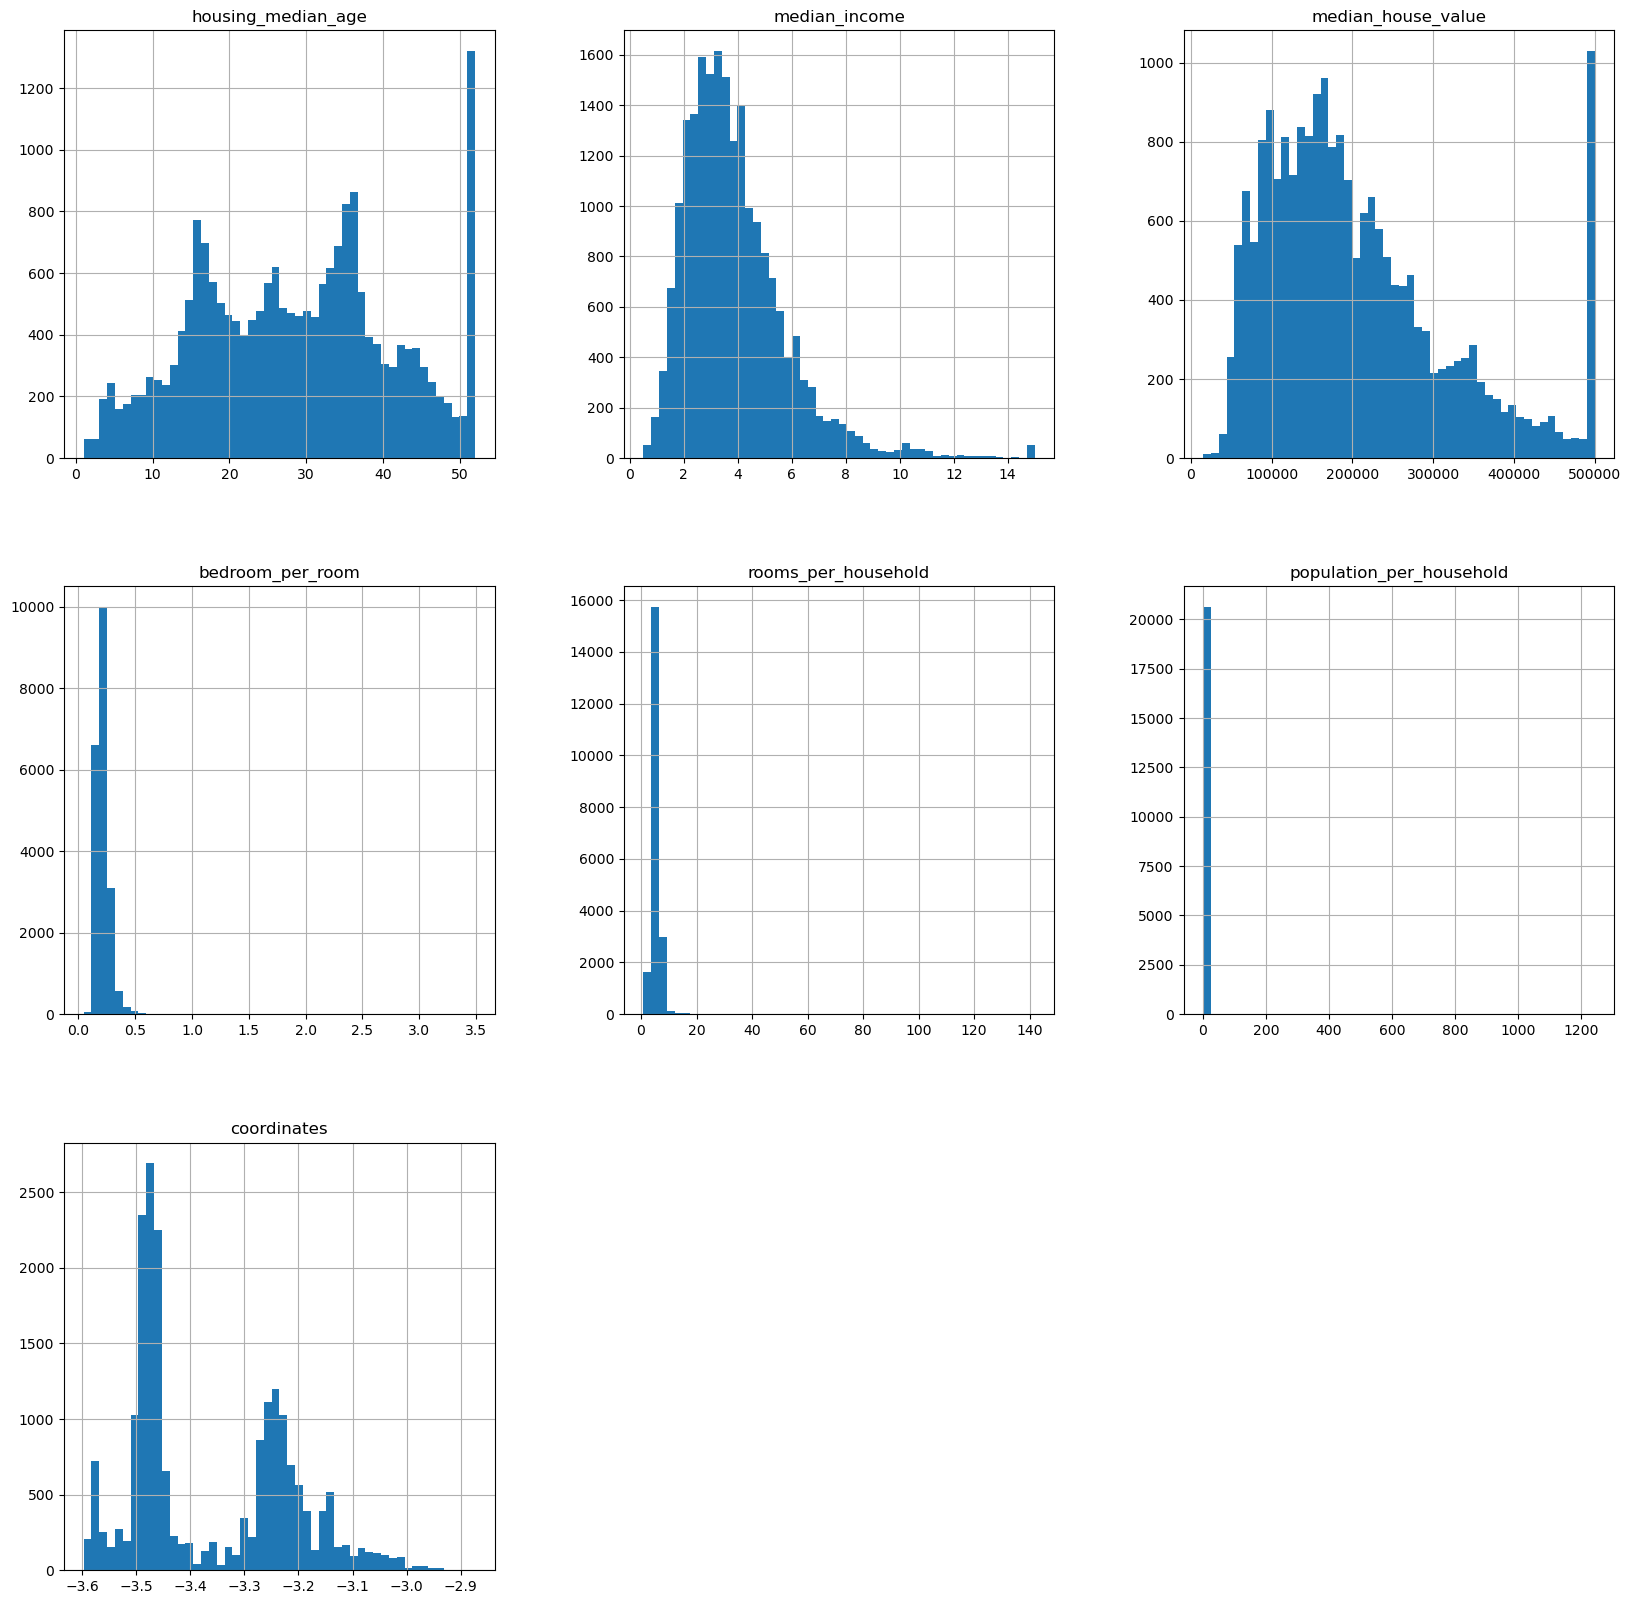

In [16]:
housing.hist(bins=50, figsize=(20,20))

In [23]:
housing =  pd.get_dummies(housing, columns=['ocean_proximity'])
housing

,housing_median_age,median_income,median_house_value,bedroom_per_room,rooms_per_household,population_per_household,coordinates,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,8.3252,452600,0.146591,6.984127,2.555556,-3.226769,0,0,0,1,0
1,21,8.3014,358500,0.155797,6.238137,2.109842,-3.228209,0,0,0,1,0
2,52,7.2574,352100,0.129516,8.288136,2.802260,-3.229590,0,0,0,1,0
3,52,5.6431,341300,0.184458,5.817352,2.547945,-3.229855,0,0,0,1,0
4,52,3.8462,342200,0.172096,6.281853,2.181467,-3.229855,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1.5603,78100,0.224625,5.045455,2.560606,-3.067123,0,1,0,0,0
20636,18,2.5568,77100,0.215208,6.114035,3.122807,-3.069385,0,1,0,0,0
20637,17,1.7000,92300,0.215173,5.205543,2.325635,-3.074309,0,1,0,0,0
20638,18,1.8672,84700,0.219892,5.329513,2.123209,-3.076845,0,1,0,0,0


In [24]:
#list comprehension to change columns to remove special char/space to avoid issues 
'''housing.columns = [c.lower().replace('_',' ').replace('<','_') for c in housing.columns]
housing'''
housing

,housing_median_age,median_income,median_house_value,bedroom_per_room,rooms_per_household,population_per_household,coordinates,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,8.3252,452600,0.146591,6.984127,2.555556,-3.226769,0,0,0,1,0
1,21,8.3014,358500,0.155797,6.238137,2.109842,-3.228209,0,0,0,1,0
2,52,7.2574,352100,0.129516,8.288136,2.802260,-3.229590,0,0,0,1,0
3,52,5.6431,341300,0.184458,5.817352,2.547945,-3.229855,0,0,0,1,0
4,52,3.8462,342200,0.172096,6.281853,2.181467,-3.229855,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1.5603,78100,0.224625,5.045455,2.560606,-3.067123,0,1,0,0,0
20636,18,2.5568,77100,0.215208,6.114035,3.122807,-3.069385,0,1,0,0,0
20637,17,1.7000,92300,0.215173,5.205543,2.325635,-3.074309,0,1,0,0,0
20638,18,1.8672,84700,0.219892,5.329513,2.123209,-3.076845,0,1,0,0,0


In [25]:
housing.columns

Index(['housing_median_age', 'median_income', 'median_house_value',
       'bedroom_per_room', 'rooms_per_household', 'population_per_household',
       'coordinates', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

# Linear Regression

In [26]:
housing.isnull().sum()

housing_median_age            0
median_income                 0
median_house_value            0
bedroom_per_room              0
rooms_per_household           0
population_per_household      0
coordinates                   0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [27]:
housing.columns

Index(['housing_median_age', 'median_income', 'median_house_value',
       'bedroom_per_room', 'rooms_per_household', 'population_per_household',
       'coordinates', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [28]:
print([col.strip() for col in housing.columns])

['housing_median_age', 'median_income', 'median_house_value', 'bedroom_per_room', 'rooms_per_household', 'population_per_household', 'coordinates', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [29]:
#feature selection

X = housing[['housing_median_age', 'median_income', 'bedroom_per_room', 'rooms_per_household', 'population_per_household', 'coordinates', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y = housing['median_house_value']

#split data 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

In [30]:
#using scikit-learn linear regression
model = LinearRegression()

#list all available hyper parameters
print('Hyper parameters:', model.get_params())

Hyper parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [32]:
#train model
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [34]:
#Evaluate the model 
#R^2 score - value closer to 1 indicates model is close to perfection 

print('--------------------------------')
print('Linear Regression Test Accuracy:', model.score(X_test, y_test))
print(pd.DataFrame({'Actual': y_test, 'Predicted': predictions}))
print('Root Mean Squared Error:', mean_squared_error(y_test, predictions)**(0.5))
print('---------------------------------')

--------------------------------
Linear Regression Test Accuracy: 0.5539152802688379
       Actual      Predicted
20046   47700  104715.540790
3024    45800   90644.833269
15663  500001  215552.381354
20484  218600  283365.007591
9814   278000  245112.099874
...       ...            ...
17505  237500  209304.634501
13512   67300   74640.438821
10842  218400  215452.143080
16559  119400  125811.202747
5786   209800  201373.682871

[6192 rows x 2 columns]
Root Mean Squared Error: 76518.23874933716
---------------------------------
